In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('fifa.csv')

In [3]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

In [5]:
df.isnull().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys       

In [6]:
df = df.drop(columns=['Club Logo','Flag','Photo','Jersey Number','Body Type'])

In [7]:
pd.options.display.max_columns=100
df= df[~(df['Height'].isnull())]

In [8]:
df['Club'].fillna('Free Agent',inplace=True)

In [9]:
df['Contract Valid Until']= pd.to_datetime(df['Contract Valid Until'],errors='coerce')

In [10]:
df = df[~(df['Position'].isnull())]

In [11]:
df['Joined'].fillna(0,inplace=True)

In [12]:
df['Loaned From'].fillna('N/A',inplace=True)

In [13]:
df['Release Clause'].fillna('0',inplace=True)

In [14]:
df.isnull().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                          0
Value                         0
Wage                          0
Preferred Foot                0
International Reputation      0
Weak Foot                     0
Skill Moves                   0
Work Rate                     0
Position                      0
Joined                        0
Loaned From                   0
Contract Valid Until        229
Height                        0
Weight                        0
Crossing                      0
Finishing                     0
HeadingAccuracy               0
ShortPassing                  0
Volleys                       0
Dribbling                     0
Curve                         0
FKAccuracy                    0
LongPassing                   0
BallControl                   0
Acceleration                  0
SprintSp

In [15]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,RF,"Jul 1, 2004",N/A,2021-01-01,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,ST,"Jul 10, 2018",N/A,2022-01-01,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,LW,"Aug 3, 2017",N/A,2022-01-01,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,4.0,3.0,1.0,Medium/ Medium,GK,"Jul 1, 2011",N/A,2020-01-01,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,4.0,5.0,4.0,High/ High,RCM,"Aug 30, 2015",N/A,2023-01-01,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [16]:
def Val(c):
    h = input('Enter the column name')
    c[h]= c[h].str.replace('€','')
    l=[]
    k=[]
    for i in c[h].values:
        if 'M' in i:
            l.append(1000000)
            i = i.replace('M','')
            k.append(i)
        else:
            l.append(1000)
            i = i.replace('K','')
            k.append(i)

    c['v']=l
    c['v'] = c['v']
    c[h]   = k
    c[h]   = c[h].astype('float')
    c[h]   = c[h]*c['v']
    c.drop(columns='v', inplace=True)

In [17]:
df['Value']= df['Value'].str.replace('€','')
l=[]
k=[]
for i in df['Value'].values:
    if 'M' in i:
        l.append(1000000)
        i = i.replace('M','')
        k.append(i)
    else:
        l.append(1000)
        i = i.replace('K','')
        k.append(i)

df['v']=l
df['Value']   = k
df['Value']   = df['Value'].astype('float')
df['Value']   = df['Value']*df['v']
df.drop(columns='v', inplace=True)

In [18]:
df['Wage']= df['Wage'].str.replace('€','')
l=[]
k=[]
for i in df['Wage'].values:
    if 'M' in i:
        l.append(1000000)
        i = i.replace('M','')
        k.append(i)
    else:
        l.append(1000)
        i = i.replace('K','')
        k.append(i)

df['v']=l
df['Wage']   = k
df['Wage']   = df['Wage'].astype('float')
df['Wage']   = df['Wage']*df['v']
df.drop(columns='v', inplace=True)

In [19]:
df['Release Clause']= df['Release Clause'].str.replace('€','')
l=[]
k=[]
for i in df['Release Clause'].values:
    if 'M' in i:
        l.append(1000000)
        i = i.replace('M','')
        k.append(i)
    else:
        l.append(1000)
        i = i.replace('K','')
        k.append(i)

df['v']=l
df['Release Clause']   = k
df['Release Clause']   = df['Release Clause'].astype('float')
df['Release Clause']   = df['Release Clause']*df['v']
df.drop(columns='v', inplace=True)

In [20]:
b = df[df['Joined']==0]
d = df[~(df['Joined']==0)]

In [21]:
d['Joined'] = pd.DatetimeIndex(d['Joined']).year

<ipython-input-21-16e74e6b6611>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Joined'] = pd.DatetimeIndex(d['Joined']).year


In [22]:
b['Joined'] = b['Joined'].astype('int')

<ipython-input-22-6e0b269ce1a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['Joined'] = b['Joined'].astype('int')


In [23]:
df = pd.concat([d,b],axis=0)

In [24]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,4.0,4.0,Medium/ Medium,RF,2004,N/A,2021-01-01,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,4.0,5.0,High/ Low,ST,2018,N/A,2022-01-01,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,5.0,5.0,5.0,High/ Medium,LW,2017,N/A,2022-01-01,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,4.0,3.0,1.0,Medium/ Medium,GK,2011,N/A,2020-01-01,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,4.0,5.0,4.0,High/ High,RCM,2015,N/A,2023-01-01,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


In [25]:
df['Height']= df['Height'].str.replace("'",'.').astype('float')

In [26]:
df['Weight'] = df['Weight'].str.replace('lbs','').astype('float')

In [27]:
df1 = df.copy()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18147 entries, 0 to 18056
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        18147 non-null  int64         
 1   Name                      18147 non-null  object        
 2   Age                       18147 non-null  int64         
 3   Nationality               18147 non-null  object        
 4   Overall                   18147 non-null  int64         
 5   Potential                 18147 non-null  int64         
 6   Club                      18147 non-null  object        
 7   Value                     18147 non-null  float64       
 8   Wage                      18147 non-null  float64       
 9   Preferred Foot            18147 non-null  object        
 10  International Reputation  18147 non-null  float64       
 11  Weak Foot                 18147 non-null  float64       
 12  Skill Moves       

# EDA

### 1.	Plot the distribution of Overall rating for all players. 

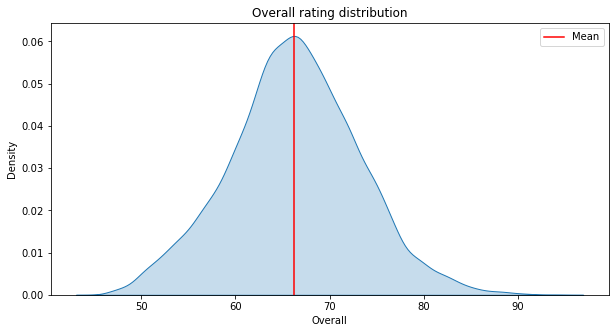

In [29]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['Overall'],fill=True)
plt.title('Overall rating distribution')
plt.axvline(x=df['Overall'].mean(),color='r',label='Mean')
plt.legend()
plt.show()

Conclusions:
1. We can see most number of players have overall rating around the mean value of the data. 
2. The data seems to have normal distribution.

### 2.	Generate pair plots for the following variables: Overall, Value, Wage, International Reputation, Height, Weight, Release Clause

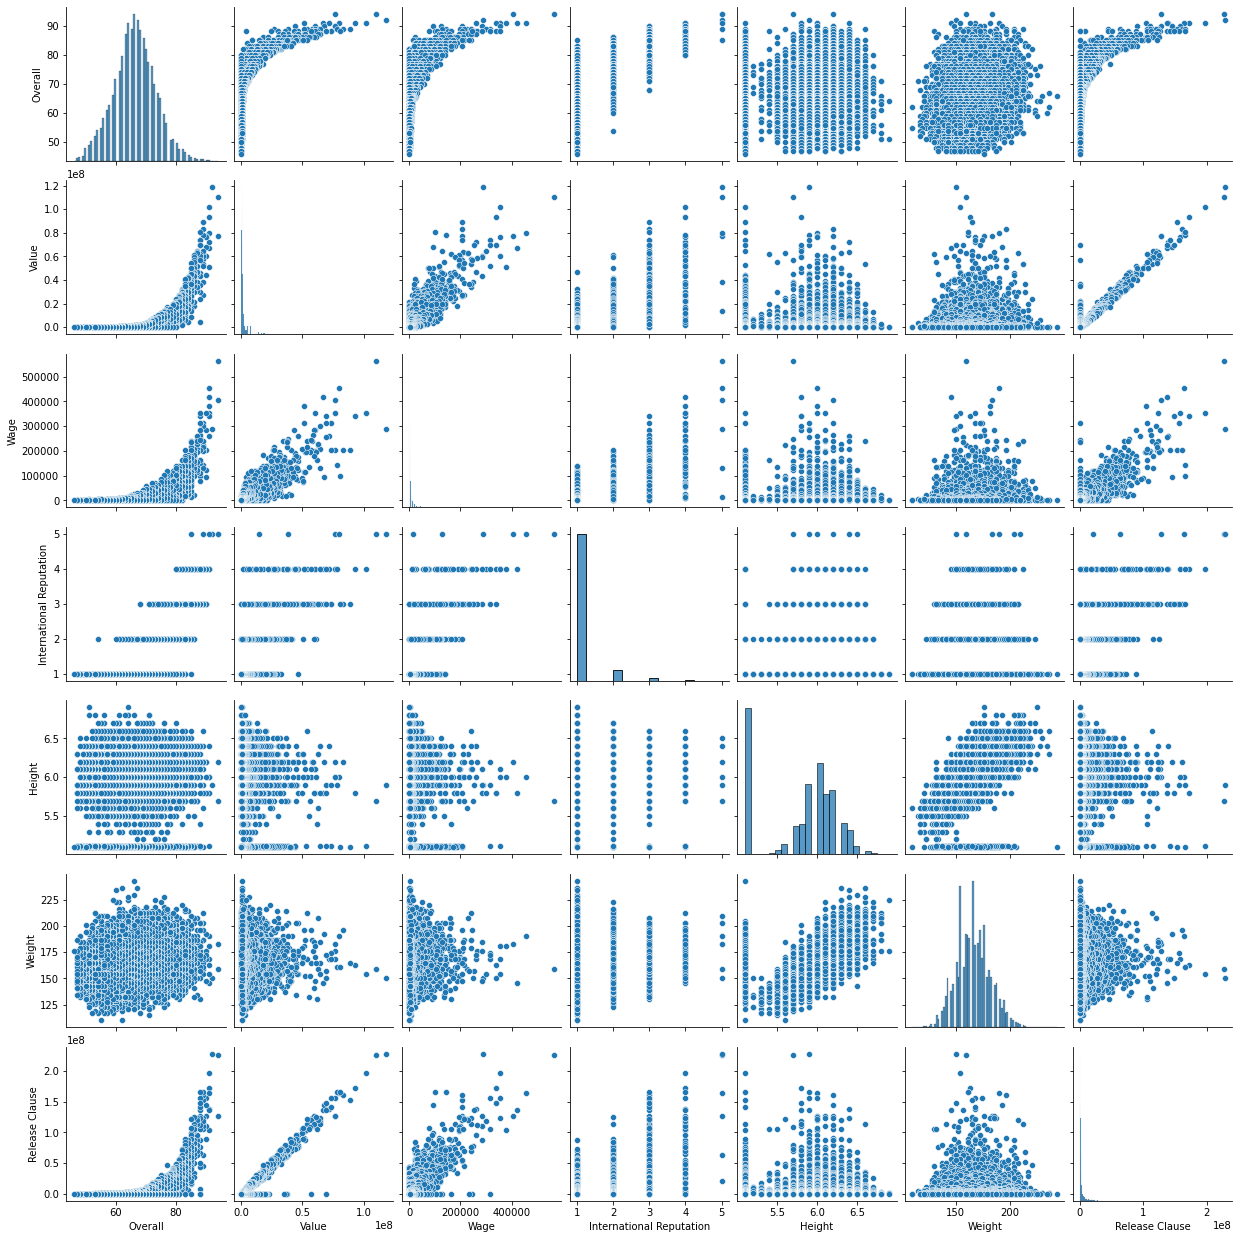

In [30]:
sns.pairplot(df[['Overall','Value','Wage','International Reputation','Height','Weight','Release Clause']])
plt.show()

### 3.	Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.

In [31]:
exp_2020 = df[pd.DatetimeIndex(df['Contract Valid Until']).year==2020].sort_values(by='Overall',ascending=False).head(20)
exp_2020.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,4.0,3.0,1.0,Medium/ Medium,GK,2011,N/A,2020-01-01,6.4,168.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,Right,4.0,4.0,4.0,High/ High,RCM,2012,N/A,2020-01-01,5.8,146.0,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,Right,4.0,3.0,3.0,High/ Medium,RCB,2005,N/A,2020-01-01,6.0,181.0,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,4.0,4.0,4.0,High/ Medium,LF,2012,N/A,2020-01-01,5.8,163.0,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
13,168542,David Silva,32,Spain,90,90,Manchester City,60000000.0,285000.0,Left,4.0,2.0,4.0,High/ Medium,LCM,2010,N/A,2020-01-01,5.8,148.0,84.0,76.0,54.0,93.0,82.0,89.0,82.0,77.0,87.0,94.0,70.0,64.0,92.0,90.0,90.0,72.0,64.0,78.0,52.0,75.0,57.0,50.0,89.0,92.0,75.0,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111000000.0


#### a)	What would the average wage for this set of players be?

In [32]:
print('The average wage for the top 20 players with highest overall rating whose contract expires in 2020 is',exp_2020['Wage'].mean())

The average wage for the top 20 players with highest overall rating whose contract expires in 2020 is 205450.0


#### b)	What is the average age?

In [33]:
print('The average age for the top 20 players with highest overall rating whose contract expires in 2020 is',exp_2020['Age'].mean())

The average age for the top 20 players with highest overall rating whose contract expires in 2020 is 30.65


#### c)	Is there a correlation between the Overall rating and Value for these players?

In [34]:
print('The Correlation coefficient for Overall rating and Value of the players is',round(np.corrcoef(df['Overall'],df['Value'])[0,1],2))
print('Since the value is 0.63 we can say there is a significant correlation between the 2 variables.')

The Correlation coefficient for Overall rating and Value of the players is 0.63
Since the value is 0.63 we can say there is a significant correlation between the 2 variables.


### 4.	Generate tables containing the top 5 players by Overall rating for each unique position.

In [35]:
pos = df['Position'].unique()
print('The unique positions are\n',pos)

The unique positions are
 ['RF' 'ST' 'LW' 'GK' 'RCM' 'LF' 'RS' 'RCB' 'LCM' 'CB' 'LDM' 'CAM' 'CDM'
 'LS' 'LCB' 'RM' 'LM' 'LB' 'RDM' 'RW' 'CM' 'RB' 'RAM' 'CF' 'LAM' 'RWB'
 'LWB']


In [36]:
di={}
for i in pos:
    di[i] = df[df['Position']==i].sort_values(by = 'Overall',ascending=False).head(5)

In [37]:
di['RF']

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,4.0,4.0,Medium/ Medium,RF,2004,N/A,2021-01-01,5.7,159.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
50,175943,D. Mertens,31,Belgium,87,87,Napoli,45000000.0,135000.0,Right,3.0,4.0,4.0,High/ Low,RF,2013,N/A,2020-01-01,5.7,134.0,77.0,86.0,35.0,82.0,70.0,91.0,82.0,79.0,74.0,89.0,93.0,85.0,94.0,88.0,92.0,80.0,60.0,75.0,42.0,81.0,59.0,36.0,87.0,83.0,79.0,81.0,25.0,40.0,40.0,7.0,10.0,8.0,10.0,4.0,76500000.0
528,172114,D. Valeri,32,Argentina,80,80,Portland Timbers,11500000.0,12000.0,Right,2.0,3.0,3.0,High/ Medium,RF,2013,N/A,2018-01-01,5.1,165.0,78.0,80.0,70.0,79.0,75.0,78.0,80.0,79.0,76.0,82.0,62.0,60.0,72.0,80.0,73.0,85.0,68.0,82.0,63.0,84.0,53.0,36.0,84.0,82.0,79.0,83.0,39.0,40.0,30.0,15.0,15.0,8.0,10.0,12.0,17300000.0
890,150516,L. Podolski,33,Germany,78,78,Vissel Kobe,6500000.0,11000.0,Left,3.0,3.0,4.0,Medium/ Low,RF,2017,N/A,2019-01-01,6.0,183.0,75.0,77.0,66.0,76.0,88.0,78.0,80.0,75.0,67.0,78.0,76.0,75.0,67.0,76.0,70.0,92.0,71.0,70.0,83.0,80.0,70.0,36.0,75.0,79.0,83.0,79.0,54.0,39.0,39.0,10.0,9.0,16.0,9.0,9.0,8100000.0
1774,201313,C. Ciano,28,Italy,75,75,Frosinone,6500000.0,17000.0,Left,1.0,4.0,4.0,High/ Medium,RF,2017,N/A,2021-01-01,5.9,161.0,72.0,70.0,60.0,73.0,67.0,76.0,75.0,76.0,70.0,77.0,87.0,75.0,82.0,71.0,78.0,70.0,55.0,68.0,62.0,71.0,51.0,25.0,67.0,72.0,70.0,74.0,24.0,23.0,20.0,9.0,12.0,9.0,9.0,7.0,11700000.0


In [38]:
di['ST']

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,4.0,5.0,High/ Low,ST,2018,N/A,2022-01-01,6.2,183.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
10,188545,R. Lewandowski,29,Poland,90,90,FC Bayern München,77000000.0,205000.0,Right,4.0,4.0,4.0,High/ Medium,ST,2014,N/A,2021-01-01,6.0,176.0,62.0,91.0,85.0,83.0,89.0,85.0,77.0,86.0,65.0,89.0,77.0,78.0,78.0,90.0,78.0,88.0,84.0,78.0,84.0,84.0,80.0,39.0,91.0,77.0,88.0,86.0,34.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,127100000.0
16,202126,H. Kane,24,England,89,91,Tottenham Hotspur,83500000.0,205000.0,Right,3.0,4.0,3.0,High/ High,ST,2010,N/A,2024-01-01,6.2,196.0,75.0,94.0,85.0,80.0,84.0,80.0,78.0,68.0,82.0,84.0,68.0,72.0,71.0,91.0,71.0,88.0,78.0,89.0,84.0,85.0,76.0,35.0,93.0,80.0,90.0,89.0,56.0,36.0,38.0,8.0,10.0,11.0,14.0,11.0,160700000.0
23,153079,S. Agüero,30,Argentina,89,89,Manchester City,64500000.0,300000.0,Right,4.0,4.0,4.0,High/ Medium,ST,2011,N/A,2021-01-01,5.8,154.0,70.0,93.0,77.0,81.0,85.0,89.0,82.0,73.0,64.0,89.0,88.0,80.0,86.0,90.0,91.0,88.0,81.0,76.0,73.0,83.0,65.0,24.0,92.0,83.0,83.0,90.0,30.0,20.0,12.0,13.0,15.0,6.0,11.0,14.0,119300000.0
36,173731,G. Bale,28,Wales,88,88,Real Madrid,60000000.0,355000.0,Left,4.0,3.0,4.0,High/ Medium,ST,2013,N/A,2022-01-01,6.1,181.0,87.0,86.0,84.0,85.0,85.0,87.0,90.0,87.0,80.0,85.0,94.0,95.0,82.0,85.0,65.0,92.0,87.0,75.0,80.0,91.0,65.0,59.0,85.0,79.0,76.0,86.0,54.0,55.0,52.0,15.0,15.0,11.0,5.0,6.0,123000000.0


In [39]:
di['LW']

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,5.0,5.0,5.0,High/ Medium,LW,2017,N/A,2022-01-01,5.9,150.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
30,197781,Isco,26,Spain,88,91,Real Madrid,73500000.0,315000.0,Right,3.0,3.0,4.0,High/ Medium,LW,2013,N/A,2022-01-01,5.9,174.0,75.0,79.0,55.0,89.0,65.0,94.0,88.0,76.0,83.0,95.0,75.0,69.0,87.0,77.0,90.0,69.0,64.0,70.0,59.0,87.0,58.0,64.0,78.0,89.0,76.0,86.0,60.0,64.0,51.0,10.0,8.0,12.0,15.0,6.0,156200000.0
32,189242,Coutinho,26,Brazil,88,89,FC Barcelona,69500000.0,340000.0,Right,3.0,4.0,5.0,High/ High,LW,2018,N/A,2023-01-01,5.8,150.0,79.0,79.0,48.0,88.0,75.0,91.0,91.0,86.0,83.0,92.0,89.0,75.0,92.0,83.0,93.0,83.0,59.0,79.0,61.0,93.0,59.0,49.0,84.0,90.0,70.0,85.0,55.0,54.0,47.0,12.0,7.0,9.0,14.0,6.0,147700000.0
29,198219,L. Insigne,27,Italy,88,88,Napoli,62000000.0,165000.0,Right,3.0,3.0,4.0,High/ Medium,LW,2010,N/A,2022-01-01,5.4,130.0,86.0,77.0,56.0,85.0,74.0,90.0,87.0,77.0,78.0,93.0,94.0,86.0,94.0,83.0,93.0,75.0,53.0,75.0,44.0,84.0,34.0,26.0,83.0,87.0,61.0,83.0,51.0,24.0,22.0,8.0,4.0,14.0,9.0,10.0,105400000.0
55,222492,L. Sané,22,Germany,86,92,Manchester City,61000000.0,195000.0,Left,2.0,3.0,4.0,High/ Medium,LW,2016,N/A,2021-01-01,6.0,165.0,83.0,81.0,72.0,79.0,85.0,88.0,82.0,68.0,64.0,85.0,93.0,96.0,88.0,81.0,81.0,86.0,64.0,79.0,70.0,78.0,61.0,34.0,84.0,82.0,71.0,78.0,36.0,32.0,35.0,8.0,12.0,9.0,9.0,14.0,125100000.0


In [40]:
di['GK']

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,4.0,3.0,1.0,Medium/ Medium,GK,2011,N/A,2020-01-01,6.4,168.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
9,200389,J. Oblak,25,Slovenia,90,93,Atlético Madrid,68000000.0,94000.0,Right,3.0,3.0,1.0,Medium/ Medium,GK,2014,N/A,2021-01-01,6.2,192.0,13.0,11.0,15.0,29.0,13.0,12.0,13.0,14.0,26.0,16.0,43.0,60.0,67.0,86.0,49.0,22.0,76.0,41.0,78.0,12.0,34.0,19.0,11.0,70.0,11.0,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,144500000.0
18,192448,M. ter Stegen,26,Germany,89,92,FC Barcelona,58000000.0,240000.0,Right,3.0,4.0,1.0,Medium/ Medium,GK,2014,N/A,2022-01-01,6.2,187.0,15.0,14.0,11.0,36.0,14.0,17.0,18.0,12.0,42.0,18.0,38.0,50.0,37.0,85.0,43.0,22.0,79.0,35.0,79.0,10.0,43.0,22.0,11.0,69.0,25.0,69.0,25.0,13.0,10.0,87.0,85.0,88.0,85.0,90.0,123300000.0
19,192119,T. Courtois,26,Belgium,89,90,Real Madrid,53500000.0,240000.0,Left,4.0,2.0,1.0,Medium/ Medium,GK,2018,N/A,2024-01-01,6.6,212.0,14.0,14.0,13.0,33.0,12.0,13.0,19.0,20.0,35.0,23.0,46.0,52.0,61.0,84.0,45.0,36.0,68.0,38.0,70.0,17.0,23.0,15.0,13.0,44.0,27.0,66.0,20.0,18.0,16.0,85.0,91.0,72.0,86.0,88.0,113700000.0
22,167495,M. Neuer,32,Germany,89,89,FC Bayern München,38000000.0,130000.0,Right,5.0,4.0,1.0,Medium/ Medium,GK,2011,N/A,2021-01-01,6.4,203.0,15.0,13.0,25.0,55.0,11.0,30.0,14.0,11.0,59.0,48.0,54.0,60.0,51.0,84.0,35.0,25.0,77.0,43.0,80.0,16.0,29.0,30.0,12.0,70.0,47.0,70.0,17.0,10.0,11.0,90.0,86.0,91.0,87.0,87.0,62700000.0


In [41]:
di['RCM']

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,4.0,5.0,4.0,High/ High,RCM,2015,N/A,2023-01-01,5.11,154.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,Right,4.0,4.0,4.0,High/ High,RCM,2012,N/A,2020-01-01,5.80,146.0,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
53,168651,I. Rakitić,30,Croatia,87,87,FC Barcelona,46500000.0,260000.0,Right,4.0,3.0,3.0,High/ High,RCM,2014,N/A,2021-01-01,6.00,172.0,84.0,83.0,58.0,87.0,80.0,84.0,88.0,84.0,90.0,87.0,66.0,59.0,72.0,77.0,66.0,84.0,39.0,84.0,66.0,90.0,67.0,75.0,79.0,86.0,82.0,81.0,72.0,74.0,70.0,14.0,11.0,12.0,5.0,9.0,95300000.0
82,212622,J. Kimmich,23,Germany,85,88,FC Bayern München,40500000.0,92000.0,Right,3.0,4.0,3.0,High/ Low,RCM,2015,N/A,2023-01-01,5.90,154.0,90.0,66.0,74.0,85.0,61.0,80.0,81.0,61.0,80.0,85.0,78.0,68.0,84.0,85.0,83.0,75.0,79.0,85.0,65.0,69.0,74.0,79.0,80.0,79.0,44.0,82.0,75.0,81.0,79.0,8.0,15.0,7.0,15.0,15.0,69900000.0
83,208421,Saúl,23,Spain,85,90,Atlético Madrid,50500000.0,77000.0,Left,3.0,4.0,3.0,High/ High,RCM,2013,N/A,2026-01-01,6.00,170.0,69.0,78.0,83.0,85.0,76.0,83.0,72.0,60.0,83.0,85.0,74.0,73.0,76.0,82.0,69.0,78.0,79.0,86.0,77.0,79.0,69.0,78.0,82.0,82.0,55.0,83.0,77.0,79.0,76.0,7.0,13.0,12.0,10.0,9.0,107300000.0


In [42]:
di['LF']

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,4.0,4.0,4.0,High/ Medium,LF,2012,N/A,2020-01-01,5.8,163.0,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
15,211110,P. Dybala,24,Argentina,89,94,Juventus,89000000.0,205000.0,Left,3.0,3.0,4.0,High/ Medium,LF,2015,N/A,2022-01-01,5.1,165.0,82.0,84.0,68.0,87.0,88.0,92.0,88.0,88.0,75.0,92.0,87.0,83.0,91.0,86.0,85.0,82.0,75.0,80.0,65.0,88.0,48.0,32.0,84.0,87.0,86.0,84.0,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0,153500000.0
76,41,Iniesta,34,Spain,86,86,Vissel Kobe,21500000.0,21000.0,Right,4.0,4.0,4.0,High/ Medium,LF,2018,N/A,2021-01-01,5.7,150.0,77.0,70.0,54.0,90.0,74.0,90.0,80.0,70.0,85.0,92.0,70.0,67.0,79.0,86.0,84.0,65.0,47.0,55.0,58.0,71.0,58.0,66.0,81.0,93.0,71.0,89.0,67.0,57.0,56.0,6.0,13.0,6.0,13.0,7.0,26900000.0
272,198164,Jonathan Viera,28,Spain,82,82,Beijing Sinobo Guoan FC,22500000.0,31000.0,Right,2.0,4.0,4.0,High/ Low,LF,2018,N/A,2020-01-01,5.7,141.0,75.0,78.0,41.0,84.0,65.0,84.0,80.0,76.0,78.0,82.0,86.0,76.0,89.0,81.0,92.0,70.0,88.0,79.0,67.0,79.0,56.0,73.0,72.0,84.0,74.0,80.0,56.0,68.0,55.0,16.0,16.0,9.0,14.0,9.0,49500000.0
1379,190577,S. Blanco,30,Argentina,76,76,Portland Timbers,7500000.0,9000.0,Right,1.0,3.0,3.0,Medium/ Medium,LF,2017,N/A,2018-01-01,5.6,141.0,69.0,69.0,66.0,76.0,76.0,75.0,64.0,60.0,70.0,77.0,76.0,78.0,87.0,76.0,79.0,79.0,65.0,85.0,59.0,79.0,79.0,33.0,71.0,74.0,61.0,65.0,30.0,22.0,32.0,9.0,7.0,9.0,13.0,12.0,11300000.0


In [43]:
di['RS']

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,80000000.0,455000.0,Right,5.0,4.0,3.0,High/ Medium,RS,2014,N/A,2021-01-01,6.0,190.0,77.0,93.0,77.0,82.0,88.0,87.0,86.0,84.0,64.0,90.0,86.0,75.0,82.0,92.0,83.0,86.0,69.0,90.0,83.0,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,164000000.0
109,41236,Z. Ibrahimović,36,Sweden,85,85,LA Galaxy,14000000.0,15000.0,Right,5.0,4.0,5.0,Medium/ Low,RS,2018,N/A,2022-01-01,6.5,209.0,73.0,86.0,83.0,79.0,86.0,79.0,82.0,82.0,73.0,84.0,58.0,59.0,75.0,82.0,39.0,90.0,68.0,61.0,86.0,82.0,84.0,20.0,85.0,79.0,89.0,90.0,28.0,37.0,24.0,13.0,15.0,10.0,9.0,12.0,21000000.0
148,167397,Falcao,32,Colombia,84,84,AS Monaco,25000000.0,115000.0,Right,3.0,4.0,3.0,High/ Medium,RS,2013,N/A,2020-01-01,5.1,159.0,55.0,86.0,89.0,79.0,84.0,75.0,83.0,73.0,58.0,82.0,69.0,66.0,76.0,85.0,75.0,79.0,91.0,68.0,75.0,80.0,75.0,41.0,88.0,70.0,81.0,87.0,39.0,42.0,19.0,10.0,13.0,6.0,9.0,5.0,47500000.0
267,199451,W. Ben Yedder,27,France,82,82,Sevilla FC,23500000.0,28000.0,Right,2.0,5.0,4.0,High/ High,RS,2016,N/A,2021-01-01,5.7,150.0,74.0,84.0,74.0,78.0,78.0,84.0,80.0,76.0,66.0,83.0,87.0,83.0,91.0,83.0,87.0,79.0,81.0,69.0,60.0,69.0,55.0,44.0,87.0,79.0,76.0,84.0,34.0,33.0,26.0,6.0,13.0,9.0,7.0,7.0,49400000.0
357,202685,S. Zaza,27,Italy,81,82,Torino,21000000.0,48000.0,Left,2.0,3.0,4.0,High/ High,RS,0,Valencia CF,2019-06-30,6.1,185.0,52.0,80.0,79.0,71.0,81.0,77.0,71.0,56.0,45.0,79.0,79.0,79.0,76.0,78.0,69.0,85.0,89.0,76.0,88.0,72.0,87.0,40.0,83.0,66.0,79.0,72.0,54.0,42.0,50.0,7.0,13.0,9.0,7.0,9.0,0.0


In [44]:
di['RCB']

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,Right,4.0,3.0,3.0,High/ Medium,RCB,2005,N/A,2020-01-01,6.0,181.0,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
39,164240,Thiago Silva,33,Brazil,88,88,Paris Saint-Germain,24000000.0,165000.0,Right,4.0,3.0,2.0,Medium/ High,RCB,2012,N/A,2020-01-01,6.0,181.0,60.0,38.0,81.0,80.0,63.0,62.0,61.0,64.0,80.0,80.0,70.0,72.0,68.0,82.0,68.0,71.0,90.0,74.0,82.0,68.0,76.0,89.0,59.0,72.0,60.0,81.0,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0,44400000.0
54,152729,Piqué,31,Spain,87,87,FC Barcelona,34000000.0,240000.0,Right,4.0,3.0,2.0,High/ Medium,RCB,2008,N/A,2022-01-01,6.4,187.0,57.0,64.0,83.0,81.0,57.0,59.0,58.0,43.0,80.0,78.0,49.0,60.0,58.0,84.0,36.0,62.0,74.0,65.0,83.0,51.0,72.0,88.0,58.0,62.0,69.0,86.0,91.0,86.0,84.0,10.0,11.0,14.0,15.0,8.0,69700000.0
62,201535,R. Varane,25,France,86,91,Real Madrid,50000000.0,210000.0,Right,3.0,3.0,2.0,Medium/ High,RCB,2011,N/A,2022-01-01,6.3,179.0,36.0,40.0,83.0,75.0,42.0,57.0,46.0,54.0,76.0,77.0,83.0,85.0,63.0,83.0,40.0,52.0,79.0,73.0,84.0,53.0,77.0,82.0,44.0,56.0,43.0,82.0,87.0,88.0,87.0,11.0,11.0,9.0,5.0,14.0,106300000.0
70,184344,L. Bonucci,31,Italy,86,86,Juventus,30000000.0,160000.0,Right,3.0,3.0,2.0,Low/ High,RCB,2018,N/A,2023-01-01,6.3,187.0,44.0,48.0,86.0,77.0,58.0,69.0,56.0,61.0,85.0,75.0,57.0,65.0,60.0,84.0,52.0,74.0,85.0,71.0,83.0,65.0,82.0,90.0,38.0,74.0,70.0,86.0,90.0,86.0,80.0,2.0,2.0,3.0,2.0,4.0,49500000.0


In [45]:
di['LCM']

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
11,182521,T. Kroos,28,Germany,90,90,Real Madrid,76500000.0,355000.0,Right,4.0,5.0,3.0,Medium/ Medium,LCM,2014,N/A,2022-01-01,6.0,168.0,88.0,76.0,54.0,92.0,82.0,81.0,86.0,84.0,93.0,90.0,64.0,62.0,70.0,89.0,71.0,87.0,30.0,75.0,73.0,92.0,60.0,82.0,79.0,86.0,73.0,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,156800000.0
13,168542,David Silva,32,Spain,90,90,Manchester City,60000000.0,285000.0,Left,4.0,2.0,4.0,High/ Medium,LCM,2010,N/A,2020-01-01,5.8,148.0,84.0,76.0,54.0,93.0,82.0,89.0,82.0,77.0,87.0,94.0,70.0,64.0,92.0,90.0,90.0,72.0,64.0,78.0,52.0,75.0,57.0,50.0,89.0,92.0,75.0,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111000000.0
52,171877,M. Hamšík,30,Slovakia,87,87,Napoli,46500000.0,125000.0,Right,3.0,5.0,3.0,High/ Medium,LCM,2007,N/A,2020-01-01,6.0,174.0,78.0,79.0,74.0,88.0,79.0,86.0,80.0,72.0,83.0,87.0,69.0,68.0,76.0,88.0,66.0,82.0,71.0,84.0,67.0,83.0,56.0,72.0,88.0,86.0,70.0,84.0,75.0,73.0,62.0,8.0,6.0,4.0,14.0,14.0,79100000.0
63,199556,M. Verratti,25,Italy,86,89,Paris Saint-Germain,55000000.0,135000.0,Right,3.0,4.0,4.0,Medium/ High,LCM,2012,N/A,2021-01-01,5.5,132.0,72.0,60.0,55.0,90.0,64.0,90.0,73.0,64.0,89.0,88.0,69.0,62.0,87.0,85.0,94.0,56.0,64.0,77.0,52.0,58.0,89.0,84.0,71.0,87.0,64.0,93.0,78.0,83.0,80.0,12.0,12.0,15.0,15.0,10.0,105900000.0
114,212198,Bruno Fernandes,23,Portugal,84,88,Sporting CP,40500000.0,22000.0,Right,2.0,3.0,4.0,High/ Medium,LCM,2017,N/A,2023-01-01,5.1,152.0,84.0,73.0,58.0,85.0,84.0,83.0,85.0,81.0,82.0,85.0,79.0,76.0,77.0,84.0,78.0,87.0,72.0,89.0,67.0,88.0,65.0,70.0,79.0,86.0,81.0,83.0,63.0,66.0,53.0,12.0,14.0,15.0,8.0,14.0,84000000.0


In [46]:
di['CB']

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
12,182493,D. Godín,32,Uruguay,90,90,Atlético Madrid,44000000.0,125000.0,Right,3.0,3.0,2.0,Medium/ High,CB,2010,N/A,2019-01-01,6.2,172.0,55.0,42.0,92.0,79.0,47.0,53.0,49.0,51.0,70.0,76.0,68.0,68.0,58.0,85.0,54.0,67.0,91.0,66.0,88.0,43.0,89.0,88.0,48.0,52.0,50.0,82.0,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0,90200000.0
42,205600,S. Umtiti,24,France,87,92,FC Barcelona,57000000.0,205000.0,Left,3.0,3.0,2.0,Medium/ High,CB,2016,N/A,2023-01-01,6.0,165.0,69.0,51.0,79.0,81.0,70.0,69.0,72.0,62.0,73.0,77.0,71.0,73.0,68.0,82.0,66.0,83.0,89.0,78.0,84.0,74.0,81.0,87.0,58.0,58.0,61.0,82.0,90.0,89.0,86.0,15.0,10.0,14.0,12.0,15.0,121100000.0
73,177509,M. Benatia,31,Morocco,86,86,Juventus,30000000.0,160000.0,Right,3.0,3.0,2.0,Medium/ High,CB,2014,N/A,2020-01-01,6.2,207.0,45.0,47.0,83.0,65.0,44.0,64.0,34.0,27.0,65.0,64.0,65.0,75.0,59.0,82.0,53.0,66.0,85.0,69.0,91.0,24.0,86.0,86.0,38.0,47.0,41.0,82.0,89.0,87.0,85.0,7.0,4.0,8.0,7.0,11.0,49500000.0
89,192366,N. Otamendi,30,Argentina,85,85,Manchester City,28500000.0,170000.0,Right,3.0,3.0,2.0,High/ High,CB,2015,N/A,2022-01-01,6.0,179.0,52.0,54.0,85.0,75.0,57.0,51.0,50.0,39.0,72.0,70.0,57.0,61.0,64.0,79.0,62.0,69.0,92.0,67.0,80.0,56.0,91.0,84.0,51.0,53.0,45.0,80.0,83.0,85.0,84.0,12.0,5.0,8.0,11.0,12.0,52700000.0
102,171919,Naldo,35,Brazil,85,85,FC Schalke 04,9000000.0,38000.0,Right,3.0,4.0,2.0,Medium/ Medium,CB,2016,N/A,2020-01-01,6.6,201.0,45.0,57.0,94.0,76.0,60.0,60.0,52.0,76.0,70.0,68.0,60.0,65.0,46.0,85.0,36.0,92.0,45.0,61.0,83.0,82.0,72.0,83.0,53.0,59.0,60.0,84.0,86.0,88.0,85.0,14.0,10.0,14.0,8.0,14.0,15300000.0


In [47]:
di['LDM']

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
14,215914,N. Kanté,27,France,89,90,Chelsea,63000000.0,225000.0,Right,3.0,3.0,2.0,Medium/ High,LDM,2016,N/A,2023-01-01,5.60,159.0,68.0,65.0,54.0,86.0,56.0,79.0,49.0,49.0,81.0,80.0,82.0,78.0,82.0,93.0,92.0,71.0,77.0,96.0,76.0,69.0,90.0,92.0,71.0,79.0,54.0,85.0,90.0,91.0,85.0,15.0,12.0,10.0,7.0,10.0,121300000.0
91,187961,Paulinho,29,Brazil,85,85,Guangzhou Evergrande Taobao FC,37000000.0,235000.0,Right,3.0,3.0,3.0,High/ High,LDM,0,FC Barcelona,2019-06-30,6.00,157.0,64.0,81.0,85.0,84.0,75.0,82.0,66.0,72.0,80.0,84.0,73.0,73.0,69.0,84.0,66.0,83.0,90.0,92.0,81.0,80.0,81.0,81.0,84.0,78.0,71.0,80.0,75.0,81.0,73.0,16.0,16.0,11.0,6.0,8.0,0.0
119,207865,Marquinhos,24,Brazil,84,89,Paris Saint-Germain,35500000.0,90000.0,Right,3.0,3.0,2.0,Medium/ Medium,LDM,2013,N/A,2022-01-01,6.00,165.0,72.0,33.0,80.0,81.0,31.0,59.0,49.0,32.0,78.0,76.0,73.0,76.0,69.0,81.0,68.0,53.0,86.0,75.0,74.0,35.0,80.0,84.0,46.0,51.0,31.0,79.0,85.0,87.0,87.0,6.0,6.0,12.0,10.0,13.0,68300000.0
217,176266,Lucas Leiva,31,Brazil,83,83,Lazio,17500000.0,64000.0,Right,3.0,3.0,3.0,Medium/ High,LDM,2017,N/A,2020-01-01,5.10,172.0,63.0,62.0,72.0,82.0,59.0,77.0,74.0,47.0,81.0,78.0,67.0,67.0,78.0,82.0,80.0,77.0,82.0,80.0,67.0,66.0,80.0,87.0,66.0,81.0,61.0,86.0,82.0,82.0,78.0,10.0,8.0,8.0,5.0,6.0,29800000.0
323,228702,F. de Jong,21,Netherlands,81,89,Ajax,26000000.0,19000.0,Right,1.0,3.0,4.0,Medium/ Medium,LDM,2015,N/A,2022-01-01,5.11,154.0,75.0,52.0,64.0,87.0,64.0,86.0,74.0,61.0,82.0,88.0,74.0,76.0,84.0,83.0,78.0,68.0,76.0,74.0,69.0,55.0,62.0,78.0,63.0,85.0,45.0,86.0,69.0,73.0,70.0,7.0,13.0,10.0,10.0,9.0,41600000.0


In [48]:
di['CAM']

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
17,194765,A. Griezmann,27,France,89,90,Atlético Madrid,78000000.0,145000.0,Left,4.0,3.0,4.0,High/ High,CAM,2014,N/A,2023-01-01,5.90,161.0,82.0,90.0,84.0,83.0,87.0,88.0,84.0,78.0,76.0,90.0,88.0,85.0,90.0,90.0,80.0,80.0,90.0,83.0,62.0,82.0,69.0,35.0,91.0,83.0,79.0,87.0,59.0,47.0,48.0,14.0,8.0,14.0,13.0,14.0,165800000.0
31,190460,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,73500000.0,205000.0,Right,3.0,5.0,4.0,High/ Medium,CAM,2013,N/A,2020-01-01,5.11,168.0,88.0,80.0,52.0,91.0,77.0,84.0,86.0,87.0,88.0,91.0,75.0,73.0,79.0,88.0,81.0,84.0,50.0,92.0,58.0,89.0,46.0,56.0,83.0,91.0,67.0,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141500000.0
61,201942,Roberto Firmino,26,Brazil,86,87,Liverpool,53000000.0,195000.0,Right,3.0,4.0,4.0,High/ High,CAM,2015,N/A,2023-01-01,5.11,168.0,72.0,87.0,77.0,86.0,81.0,87.0,80.0,65.0,75.0,88.0,78.0,77.0,80.0,86.0,81.0,81.0,81.0,90.0,74.0,76.0,73.0,58.0,87.0,85.0,72.0,87.0,60.0,64.0,42.0,8.0,11.0,9.0,6.0,10.0,104700000.0
66,189596,T. Müller,28,Germany,86,86,FC Bayern München,45000000.0,135000.0,Right,4.0,4.0,3.0,High/ High,CAM,2008,N/A,2021-01-01,6.10,165.0,79.0,87.0,82.0,83.0,84.0,75.0,81.0,59.0,72.0,82.0,73.0,75.0,75.0,91.0,72.0,78.0,81.0,87.0,68.0,80.0,57.0,58.0,92.0,85.0,60.0,83.0,44.0,41.0,44.0,6.0,7.0,11.0,14.0,14.0,74300000.0
74,176635,M. Özil,29,Germany,86,86,Arsenal,43500000.0,190000.0,Left,4.0,2.0,4.0,Medium/ Low,CAM,2013,N/A,2021-01-01,5.11,168.0,83.0,73.0,54.0,89.0,80.0,84.0,84.0,77.0,82.0,90.0,72.0,69.0,79.0,84.0,70.0,70.0,48.0,69.0,57.0,75.0,48.0,24.0,83.0,91.0,67.0,82.0,24.0,16.0,19.0,6.0,14.0,10.0,6.0,14.0,82700000.0


In [49]:
di['CDM']

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
20,189511,Sergio Busquets,29,Spain,89,89,FC Barcelona,51500000.0,315000.0,Right,4.0,3.0,3.0,Medium/ Medium,CDM,2008,N/A,2023-01-01,6.2,168.0,62.0,67.0,68.0,89.0,44.0,80.0,66.0,68.0,82.0,88.0,50.0,52.0,66.0,87.0,52.0,61.0,66.0,86.0,77.0,54.0,85.0,87.0,77.0,87.0,60.0,90.0,90.0,86.0,80.0,5.0,8.0,13.0,9.0,13.0,105600000.0
27,200145,Casemiro,26,Brazil,88,90,Real Madrid,59500000.0,285000.0,Right,3.0,3.0,2.0,Medium/ High,CDM,2013,N/A,2021-01-01,6.1,185.0,52.0,59.0,76.0,85.0,53.0,69.0,59.0,74.0,82.0,78.0,59.0,65.0,62.0,84.0,66.0,86.0,88.0,87.0,89.0,79.0,87.0,87.0,69.0,77.0,66.0,84.0,88.0,90.0,87.0,13.0,14.0,16.0,12.0,12.0,126400000.0
72,180206,M. Pjanić,28,Bosnia Herzegovina,86,86,Juventus,44000000.0,180000.0,Right,3.0,4.0,3.0,Medium/ Medium,CDM,2016,N/A,2023-01-01,5.1,159.0,80.0,60.0,60.0,89.0,72.0,86.0,86.0,92.0,85.0,89.0,66.0,66.0,77.0,84.0,79.0,78.0,61.0,78.0,66.0,82.0,70.0,78.0,70.0,88.0,79.0,86.0,75.0,74.0,70.0,7.0,7.0,13.0,7.0,8.0,72600000.0
75,135507,Fernandinho,33,Brazil,86,86,Manchester City,18000000.0,185000.0,Right,3.0,4.0,3.0,Medium/ High,CDM,2013,N/A,2020-01-01,5.1,148.0,68.0,69.0,63.0,85.0,74.0,77.0,70.0,72.0,81.0,82.0,68.0,67.0,72.0,86.0,78.0,83.0,76.0,79.0,76.0,78.0,87.0,88.0,70.0,75.0,61.0,79.0,85.0,85.0,80.0,12.0,11.0,5.0,13.0,7.0,33300000.0
118,209499,Fabinho,24,Brazil,84,88,Liverpool,34000000.0,120000.0,Right,3.0,2.0,3.0,Medium/ Medium,CDM,2018,N/A,2023-01-01,6.2,172.0,79.0,66.0,75.0,83.0,47.0,76.0,71.0,53.0,78.0,82.0,69.0,72.0,69.0,83.0,67.0,78.0,75.0,92.0,79.0,65.0,85.0,84.0,70.0,75.0,91.0,84.0,83.0,86.0,84.0,13.0,12.0,6.0,8.0,8.0,67200000.0


In [50]:
di['LS']

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
21,179813,E. Cavani,31,Uruguay,89,89,Paris Saint-Germain,60000000.0,200000.0,Right,4.0,4.0,3.0,High/ High,LS,2013,N/A,2020-01-01,6.1,170.0,70.0,89.0,89.0,78.0,90.0,80.0,77.0,76.0,52.0,82.0,75.0,76.0,77.0,91.0,59.0,87.0,88.0,92.0,78.0,79.0,84.0,48.0,93.0,77.0,85.0,82.0,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,111000000.0
38,167664,G. Higuaín,30,Argentina,88,88,Milan,57000000.0,245000.0,Right,4.0,4.0,3.0,High/ Medium,LS,0,Juventus,2019-06-30,6.1,196.0,68.0,92.0,80.0,75.0,90.0,84.0,74.0,62.0,59.0,85.0,73.0,73.0,75.0,86.0,69.0,86.0,79.0,70.0,85.0,80.0,50.0,20.0,92.0,74.0,70.0,86.0,35.0,22.0,18.0,5.0,12.0,7.0,5.0,10.0,0.0
100,179844,Diego Costa,29,Spain,85,85,Atlético Madrid,38500000.0,100000.0,Right,4.0,4.0,2.0,High/ Medium,LS,2018,N/A,2021-01-01,6.2,190.0,65.0,87.0,82.0,65.0,81.0,77.0,62.0,59.0,52.0,83.0,74.0,76.0,58.0,85.0,53.0,83.0,64.0,76.0,92.0,74.0,93.0,40.0,87.0,74.0,75.0,83.0,58.0,39.0,34.0,11.0,13.0,12.0,8.0,11.0,78900000.0
151,143076,A. Gómez,30,Argentina,84,84,Atalanta,30000000.0,53000.0,Right,3.0,4.0,4.0,High/ Medium,LS,2014,N/A,2022-01-01,5.5,150.0,82.0,76.0,38.0,82.0,72.0,89.0,79.0,79.0,74.0,87.0,94.0,86.0,92.0,83.0,94.0,76.0,70.0,75.0,48.0,79.0,56.0,40.0,81.0,85.0,72.0,84.0,50.0,30.0,34.0,8.0,11.0,12.0,9.0,6.0,51000000.0
206,186627,M. Balotelli,27,Italy,83,83,OGC Nice,27500000.0,55000.0,Right,4.0,4.0,4.0,Medium/ Low,LS,2016,N/A,2019-01-01,6.2,194.0,68.0,85.0,67.0,78.0,78.0,81.0,78.0,78.0,66.0,85.0,76.0,82.0,71.0,68.0,50.0,89.0,74.0,66.0,86.0,79.0,70.0,30.0,79.0,74.0,92.0,81.0,10.0,22.0,20.0,2.0,2.0,2.0,4.0,2.0,52300000.0


In [51]:
di['LCB']

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
24,138956,G. Chiellini,33,Italy,89,89,Juventus,27000000.0,215000.0,Left,4.0,3.0,2.0,Medium/ High,LCB,2005,N/A,2020-01-01,6.2,187.0,58.0,33.0,83.0,59.0,45.0,58.0,60.0,31.0,59.0,57.0,63.0,75.0,54.0,82.0,55.0,78.0,89.0,65.0,89.0,49.0,92.0,88.0,28.0,50.0,50.0,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0
34,178603,M. Hummels,29,Germany,88,88,FC Bayern München,46000000.0,160000.0,Right,4.0,3.0,3.0,High/ Medium,LCB,2016,N/A,2021-01-01,6.3,203.0,64.0,55.0,87.0,81.0,60.0,68.0,65.0,53.0,85.0,81.0,53.0,64.0,63.0,87.0,60.0,71.0,68.0,66.0,84.0,51.0,69.0,92.0,56.0,79.0,68.0,91.0,88.0,90.0,88.0,15.0,6.0,10.0,5.0,6.0,75900000.0
44,201024,K. Koulibaly,27,Senegal,87,90,Napoli,51000000.0,115000.0,Right,3.0,3.0,2.0,High/ High,LCB,2014,N/A,2021-01-01,6.2,196.0,30.0,19.0,81.0,66.0,14.0,66.0,28.0,28.0,56.0,60.0,68.0,75.0,50.0,80.0,40.0,55.0,81.0,71.0,94.0,15.0,87.0,88.0,24.0,43.0,33.0,78.0,91.0,88.0,86.0,7.0,11.0,7.0,13.0,5.0,90500000.0
51,172871,J. Vertonghen,31,Belgium,87,87,Tottenham Hotspur,34000000.0,155000.0,Left,3.0,3.0,3.0,High/ High,LCB,2012,N/A,2019-01-01,6.2,190.0,68.0,56.0,80.0,79.0,52.0,71.0,58.0,73.0,74.0,76.0,61.0,65.0,61.0,84.0,60.0,80.0,85.0,75.0,79.0,66.0,84.0,89.0,60.0,68.0,66.0,83.0,90.0,87.0,88.0,6.0,10.0,9.0,12.0,7.0,62900000.0
59,203376,V. van Dijk,26,Netherlands,86,88,Liverpool,44500000.0,165000.0,Right,3.0,3.0,2.0,Medium/ Medium,LCB,2018,N/A,2023-01-01,6.4,203.0,53.0,52.0,82.0,76.0,45.0,70.0,60.0,70.0,78.0,73.0,74.0,77.0,61.0,85.0,49.0,81.0,85.0,71.0,92.0,64.0,81.0,86.0,41.0,59.0,62.0,83.0,88.0,89.0,84.0,13.0,10.0,13.0,11.0,11.0,87900000.0


In [52]:
di['RM']

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
25,231747,K. Mbappé,19,France,88,95,Paris Saint-Germain,81000000.0,100000.0,Right,3.0,4.0,5.0,High/ Medium,RM,2018,N/A,2022-01-01,5.10,161.0,77.0,88.0,77.0,82.0,78.0,90.0,77.0,63.0,73.0,91.0,96.0,96.0,92.0,87.0,83.0,79.0,75.0,83.0,71.0,78.0,62.0,38.0,88.0,82.0,70.0,86.0,34.0,34.0,32.0,13.0,5.0,7.0,11.0,6.0,166100000.0
26,209331,M. Salah,26,Egypt,88,89,Liverpool,69500000.0,255000.0,Left,3.0,3.0,4.0,High/ Medium,RM,2017,N/A,2023-01-01,5.90,157.0,78.0,90.0,59.0,82.0,73.0,89.0,83.0,60.0,72.0,88.0,94.0,91.0,91.0,91.0,88.0,77.0,68.0,84.0,70.0,83.0,63.0,55.0,90.0,82.0,61.0,91.0,38.0,43.0,41.0,14.0,14.0,9.0,11.0,14.0,137300000.0
122,204970,F. Thauvin,25,France,84,87,Olympique de Marseille,39000000.0,72000.0,Left,2.0,3.0,4.0,High/ Medium,RM,2017,N/A,2021-01-01,5.10,154.0,83.0,81.0,75.0,83.0,74.0,85.0,86.0,72.0,76.0,86.0,87.0,80.0,86.0,83.0,71.0,83.0,76.0,83.0,66.0,82.0,56.0,42.0,83.0,80.0,74.0,82.0,46.0,29.0,31.0,8.0,11.0,14.0,10.0,9.0,77000000.0
138,183898,A. Di María,30,Argentina,84,84,Paris Saint-Germain,29500000.0,125000.0,Left,4.0,2.0,5.0,High/ Medium,RM,2015,N/A,2021-01-01,5.11,152.0,83.0,72.0,51.0,82.0,77.0,86.0,84.0,82.0,79.0,85.0,85.0,84.0,92.0,80.0,77.0,83.0,72.0,73.0,60.0,77.0,73.0,38.0,82.0,82.0,73.0,82.0,35.0,59.0,56.0,10.0,7.0,11.0,12.0,11.0,54600000.0
153,20775,Quaresma,34,Portugal,84,84,Beşiktaş JK,15500000.0,80000.0,Right,3.0,4.0,5.0,High/ Low,RM,2015,N/A,2020-01-01,5.90,148.0,92.0,67.0,41.0,79.0,80.0,89.0,94.0,73.0,75.0,88.0,84.0,82.0,91.0,78.0,84.0,79.0,63.0,65.0,55.0,80.0,74.0,24.0,78.0,84.0,74.0,80.0,29.0,17.0,13.0,12.0,14.0,10.0,5.0,15.0,29500000.0


In [53]:
di['LM']

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
33,188567,P. Aubameyang,29,Gabon,88,88,Arsenal,59000000.0,265000.0,Right,3.0,4.0,4.0,Medium/ Low,LM,2018,N/A,2021-01-01,6.20,176.0,77.0,88.0,79.0,77.0,86.0,79.0,80.0,74.0,64.0,82.0,93.0,95.0,76.0,87.0,70.0,82.0,79.0,76.0,76.0,79.0,43.0,48.0,90.0,77.0,76.0,86.0,27.0,25.0,36.0,6.0,9.0,15.0,9.0,9.0,112100000.0
65,190483,Douglas Costa,27,Brazil,86,86,Juventus,46500000.0,175000.0,Left,3.0,3.0,5.0,High/ Medium,LM,2018,N/A,2022-01-01,5.80,154.0,84.0,67.0,50.0,84.0,76.0,92.0,84.0,78.0,68.0,91.0,97.0,93.0,93.0,84.0,91.0,86.0,61.0,78.0,63.0,80.0,55.0,48.0,76.0,84.0,77.0,84.0,45.0,38.0,34.0,13.0,15.0,9.0,12.0,5.0,76700000.0
68,188350,M. Reus,29,Germany,86,86,Borussia Dortmund,43500000.0,100000.0,Right,4.0,4.0,4.0,High/ Medium,LM,2012,N/A,2023-01-01,5.11,157.0,79.0,87.0,49.0,86.0,90.0,87.0,89.0,84.0,75.0,86.0,86.0,85.0,86.0,87.0,81.0,88.0,70.0,73.0,67.0,86.0,49.0,50.0,88.0,86.0,89.0,84.0,47.0,36.0,45.0,12.0,12.0,13.0,13.0,11.0,74000000.0
58,208722,S. Mané,26,Senegal,86,87,Liverpool,52000000.0,195000.0,Right,3.0,4.0,4.0,High/ Medium,LM,2016,N/A,2023-01-01,5.90,152.0,73.0,84.0,62.0,79.0,71.0,87.0,74.0,64.0,71.0,86.0,95.0,93.0,91.0,86.0,86.0,82.0,75.0,84.0,67.0,74.0,73.0,35.0,87.0,82.0,71.0,80.0,42.0,42.0,38.0,10.0,10.0,15.0,7.0,14.0,102700000.0
86,193747,Koke,26,Spain,85,86,Atlético Madrid,45000000.0,88000.0,Right,3.0,4.0,3.0,High/ High,LM,2011,N/A,2019-01-01,5.90,163.0,86.0,72.0,61.0,90.0,56.0,82.0,85.0,76.0,89.0,86.0,71.0,68.0,74.0,85.0,78.0,84.0,61.0,90.0,79.0,81.0,71.0,66.0,84.0,87.0,59.0,78.0,80.0,69.0,51.0,14.0,12.0,5.0,10.0,13.0,95600000.0


In [54]:
di['LB']

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
35,176676,Marcelo,30,Brazil,88,88,Real Madrid,43000000.0,285000.0,Left,4.0,4.0,5.0,High/ Low,LB,2007,N/A,2022-01-01,5.90,176.0,90.0,70.0,75.0,84.0,54.0,90.0,85.0,67.0,76.0,92.0,83.0,82.0,86.0,88.0,86.0,83.0,76.0,91.0,78.0,70.0,84.0,85.0,85.0,82.0,59.0,86.0,71.0,85.0,86.0,12.0,5.0,5.0,5.0,9.0,88200000.0
49,189332,Jordi Alba,29,Spain,87,87,FC Barcelona,38000000.0,250000.0,Left,3.0,3.0,3.0,High/ Medium,LB,2012,N/A,2020-01-01,5.70,150.0,87.0,73.0,70.0,84.0,60.0,80.0,80.0,63.0,74.0,84.0,93.0,93.0,90.0,83.0,85.0,64.0,81.0,91.0,61.0,66.0,75.0,84.0,79.0,70.0,59.0,79.0,72.0,84.0,85.0,13.0,15.0,13.0,6.0,13.0,77900000.0
64,191043,Alex Sandro,27,Brazil,86,86,Juventus,36500000.0,160000.0,Left,3.0,3.0,3.0,High/ High,LB,2015,N/A,2020-01-01,5.11,176.0,84.0,55.0,76.0,81.0,68.0,80.0,78.0,59.0,71.0,81.0,83.0,86.0,79.0,84.0,78.0,80.0,79.0,92.0,79.0,72.0,82.0,82.0,70.0,70.0,60.0,82.0,81.0,84.0,84.0,7.0,7.0,9.0,12.0,5.0,60200000.0
85,197445,D. Alaba,26,Austria,85,87,FC Bayern München,38000000.0,110000.0,Left,4.0,4.0,3.0,High/ Medium,LB,2010,N/A,2021-01-01,5.11,168.0,81.0,63.0,75.0,82.0,68.0,79.0,78.0,84.0,80.0,83.0,79.0,86.0,79.0,84.0,77.0,83.0,82.0,87.0,71.0,82.0,69.0,84.0,76.0,77.0,80.0,79.0,80.0,82.0,80.0,5.0,7.0,14.0,15.0,9.0,65600000.0
106,164169,Filipe Luís,32,Brazil,85,85,Atlético Madrid,21500000.0,81000.0,Left,3.0,3.0,3.0,High/ Medium,LB,2015,N/A,2019-01-01,6.00,163.0,86.0,59.0,72.0,80.0,56.0,77.0,74.0,75.0,77.0,83.0,76.0,75.0,75.0,85.0,62.0,71.0,71.0,89.0,74.0,60.0,81.0,84.0,71.0,70.0,65.0,88.0,78.0,84.0,86.0,11.0,15.0,9.0,9.0,5.0,44100000.0


In [55]:
di['RDM']

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
45,195864,P. Pogba,25,France,87,91,Manchester United,64000000.0,210000.0,Right,4.0,4.0,5.0,High/ Low,RDM,2016,N/A,2021-01-01,6.4,185.0,80.0,73.0,73.0,86.0,85.0,87.0,84.0,82.0,90.0,90.0,71.0,79.0,74.0,81.0,64.0,90.0,83.0,88.0,89.0,81.0,78.0,66.0,81.0,87.0,81.0,87.0,66.0,70.0,68.0,5.0,6.0,2.0,4.0,3.0,123200000.0
134,190584,Illarramendi,28,Spain,84,84,Real Sociedad,31000000.0,51000.0,Right,2.0,3.0,4.0,Medium/ High,RDM,2015,N/A,2023-01-01,5.1,165.0,68.0,72.0,51.0,86.0,58.0,78.0,76.0,68.0,82.0,83.0,66.0,57.0,71.0,84.0,75.0,69.0,63.0,77.0,68.0,76.0,76.0,87.0,79.0,86.0,50.0,79.0,69.0,83.0,80.0,15.0,7.0,11.0,14.0,12.0,65100000.0
198,193474,I. Gueye,28,Senegal,83,83,Everton,21000000.0,125000.0,Right,2.0,3.0,3.0,Medium/ High,RDM,2016,N/A,2022-01-01,5.9,146.0,60.0,50.0,69.0,80.0,32.0,75.0,33.0,61.0,72.0,79.0,76.0,72.0,80.0,81.0,80.0,80.0,87.0,89.0,70.0,66.0,84.0,87.0,67.0,67.0,54.0,80.0,84.0,89.0,84.0,8.0,6.0,8.0,12.0,13.0,39900000.0
223,53302,D. De Rossi,34,Italy,83,83,Roma,8000000.0,80000.0,Right,3.0,4.0,2.0,Medium/ High,RDM,2002,N/A,2019-01-01,6.0,183.0,57.0,50.0,81.0,81.0,74.0,64.0,62.0,71.0,80.0,77.0,63.0,67.0,64.0,80.0,72.0,81.0,77.0,74.0,81.0,72.0,84.0,87.0,55.0,71.0,75.0,87.0,90.0,82.0,80.0,10.0,7.0,13.0,10.0,9.0,13600000.0
298,183498,M. Parolo,33,Italy,82,82,Lazio,9000000.0,59000.0,Right,2.0,4.0,3.0,High/ High,RDM,2014,N/A,2020-01-01,6.0,165.0,70.0,70.0,75.0,80.0,76.0,75.0,67.0,55.0,83.0,79.0,68.0,69.0,67.0,82.0,71.0,87.0,77.0,88.0,77.0,86.0,80.0,80.0,82.0,78.0,45.0,78.0,78.0,80.0,82.0,13.0,9.0,6.0,7.0,9.0,15300000.0


In [56]:
di['RW']

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
56,218667,Bernardo Silva,23,Portugal,86,91,Manchester City,59500000.0,180000.0,Left,2.0,3.0,4.0,High/ Medium,RW,2017,N/A,2022-01-01,5.8,141.0,85.0,75.0,51.0,85.0,69.0,92.0,83.0,67.0,79.0,91.0,84.0,74.0,90.0,82.0,88.0,70.0,50.0,78.0,48.0,72.0,58.0,49.0,83.0,86.0,68.0,85.0,49.0,44.0,35.0,9.0,10.0,14.0,12.0,9.0,114500000.0
60,202652,R. Sterling,23,England,86,89,Manchester City,56500000.0,195000.0,Right,3.0,3.0,4.0,High/ Medium,RW,2015,N/A,2023-01-01,5.7,152.0,77.0,77.0,38.0,84.0,67.0,88.0,70.0,63.0,69.0,87.0,95.0,92.0,93.0,87.0,93.0,73.0,57.0,78.0,52.0,73.0,38.0,30.0,87.0,77.0,69.0,77.0,47.0,58.0,54.0,15.0,12.0,12.0,15.0,9.0,108800000.0
79,220834,Marco Asensio,22,Spain,85,92,Real Madrid,54000000.0,215000.0,Left,3.0,3.0,4.0,High/ Medium,RW,2015,N/A,2023-01-01,6.0,168.0,82.0,82.0,50.0,83.0,79.0,86.0,83.0,76.0,82.0,85.0,85.0,82.0,79.0,82.0,76.0,86.0,58.0,76.0,61.0,88.0,45.0,45.0,82.0,84.0,62.0,83.0,40.0,42.0,39.0,13.0,9.0,6.0,12.0,10.0,121500000.0
84,204485,R. Mahrez,27,Algeria,85,85,Manchester City,40500000.0,205000.0,Left,3.0,4.0,5.0,Medium/ Medium,RW,2018,N/A,2023-01-01,5.1,148.0,81.0,80.0,48.0,82.0,72.0,91.0,84.0,78.0,76.0,90.0,88.0,83.0,93.0,77.0,88.0,79.0,61.0,76.0,54.0,81.0,48.0,39.0,80.0,81.0,73.0,86.0,45.0,31.0,18.0,15.0,9.0,13.0,11.0,6.0,74900000.0
93,184941,A. Sánchez,29,Chile,85,85,Manchester United,37500000.0,215000.0,Right,4.0,3.0,4.0,High/ High,RW,2018,N/A,2022-01-01,5.7,163.0,77.0,80.0,73.0,77.0,83.0,87.0,79.0,78.0,75.0,86.0,86.0,79.0,90.0,83.0,87.0,84.0,87.0,83.0,72.0,81.0,79.0,46.0,84.0,82.0,77.0,84.0,38.0,44.0,35.0,10.0,10.0,15.0,12.0,13.0,69400000.0


In [57]:
di['CM']

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
67,189509,Thiago,27,Spain,86,86,FC Bayern München,45500000.0,130000.0,Right,3.0,3.0,5.0,Medium/ Medium,CM,2013,N/A,2021-01-01,5.90,154.0,72.0,69.0,54.0,90.0,90.0,90.0,85.0,77.0,87.0,90.0,78.0,69.0,90.0,84.0,86.0,75.0,75.0,75.0,59.0,79.0,57.0,78.0,79.0,86.0,75.0,85.0,67.0,63.0,65.0,6.0,11.0,7.0,9.0,13.0,75100000.0
78,223848,S. Milinković-Savić,23,Serbia,85,90,Lazio,50500000.0,73000.0,Right,2.0,4.0,4.0,High/ Medium,CM,2015,N/A,2023-01-01,6.30,168.0,64.0,80.0,86.0,85.0,74.0,86.0,78.0,75.0,85.0,87.0,68.0,70.0,66.0,80.0,59.0,83.0,85.0,85.0,88.0,80.0,73.0,78.0,79.0,85.0,56.0,82.0,75.0,77.0,72.0,7.0,10.0,7.0,16.0,7.0,89600000.0
121,205498,Jorginho,26,Italy,84,87,Chelsea,38000000.0,155000.0,Right,2.0,3.0,3.0,Medium/ Medium,CM,2018,N/A,2023-01-01,5.11,148.0,75.0,57.0,56.0,89.0,71.0,82.0,75.0,76.0,87.0,85.0,75.0,69.0,80.0,83.0,73.0,71.0,58.0,79.0,66.0,62.0,79.0,78.0,72.0,87.0,84.0,79.0,63.0,78.0,70.0,14.0,7.0,13.0,14.0,8.0,73200000.0
136,186942,I. Gündoğan,27,Germany,84,84,Manchester City,32000000.0,175000.0,Right,3.0,4.0,4.0,High/ Medium,CM,2016,N/A,2020-01-01,5.11,176.0,74.0,73.0,50.0,88.0,75.0,85.0,81.0,74.0,83.0,86.0,67.0,68.0,78.0,85.0,78.0,77.0,61.0,69.0,72.0,73.0,70.0,77.0,79.0,86.0,76.0,87.0,73.0,68.0,64.0,11.0,14.0,5.0,5.0,13.0,59200000.0
161,220971,N. Keïta,23,Guinea,83,88,Liverpool,34000000.0,120000.0,Right,2.0,4.0,4.0,High/ Medium,CM,2018,N/A,2023-01-01,5.80,141.0,62.0,74.0,42.0,88.0,71.0,88.0,64.0,70.0,78.0,88.0,78.0,60.0,89.0,82.0,90.0,76.0,53.0,82.0,58.0,73.0,78.0,75.0,74.0,81.0,58.0,79.0,68.0,62.0,61.0,7.0,14.0,15.0,14.0,9.0,67200000.0


In [58]:
di['RB']

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
69,184432,Azpilicueta,28,Spain,86,86,Chelsea,35000000.0,175000.0,Right,3.0,3.0,2.0,Medium/ Medium,RB,2012,N/A,2022-01-01,5.1,168.0,81.0,46.0,76.0,81.0,51.0,69.0,68.0,58.0,80.0,77.0,76.0,76.0,72.0,88.0,73.0,68.0,76.0,87.0,71.0,60.0,82.0,89.0,62.0,74.0,66.0,78.0,88.0,90.0,86.0,13.0,9.0,10.0,6.0,5.0,64800000.0
135,188377,K. Walker,28,England,84,84,Manchester City,24500000.0,165000.0,Right,3.0,2.0,2.0,High/ High,RB,2017,N/A,2022-01-01,6.0,154.0,81.0,51.0,74.0,78.0,57.0,79.0,76.0,71.0,67.0,78.0,86.0,93.0,67.0,83.0,72.0,86.0,83.0,89.0,75.0,69.0,78.0,81.0,67.0,69.0,63.0,75.0,78.0,84.0,83.0,12.0,6.0,16.0,15.0,8.0,45300000.0
123,204963,Carvajal,26,Spain,84,87,Real Madrid,31500000.0,185000.0,Right,3.0,3.0,3.0,High/ High,RB,2013,N/A,2022-01-01,5.8,161.0,83.0,41.0,70.0,81.0,34.0,76.0,72.0,47.0,71.0,83.0,79.0,84.0,81.0,82.0,79.0,64.0,76.0,84.0,74.0,36.0,81.0,83.0,61.0,57.0,45.0,77.0,83.0,83.0,85.0,13.0,13.0,15.0,9.0,15.0,66900000.0
192,199564,Sergi Roberto,26,Spain,83,86,FC Barcelona,26500000.0,170000.0,Right,3.0,3.0,4.0,High/ High,RB,2013,N/A,2022-01-01,5.1,150.0,85.0,63.0,72.0,86.0,50.0,78.0,74.0,60.0,78.0,83.0,78.0,79.0,69.0,80.0,74.0,65.0,47.0,85.0,69.0,66.0,68.0,81.0,69.0,83.0,57.0,76.0,75.0,83.0,83.0,14.0,16.0,11.0,15.0,10.0,56300000.0
216,177457,L. Bender,29,Germany,83,83,Bayer 04 Leverkusen,20000000.0,82000.0,Right,3.0,3.0,2.0,High/ High,RB,2009,N/A,2021-01-01,6.1,179.0,69.0,59.0,78.0,79.0,57.0,72.0,49.0,47.0,74.0,75.0,66.0,67.0,65.0,83.0,63.0,74.0,77.0,86.0,76.0,71.0,79.0,86.0,69.0,76.0,52.0,83.0,88.0,86.0,82.0,12.0,6.0,7.0,12.0,7.0,34000000.0


In [59]:
di['RAM']

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
129,193082,J. Cuadrado,30,Colombia,84,84,Juventus,29500000.0,150000.0,Right,3.0,3.0,5.0,High/ Medium,RAM,2015,N/A,2020-01-01,5.10,159.0,80.0,67.0,58.0,80.0,70.0,90.0,78.0,69.0,69.0,85.0,89.0,93.0,91.0,80.0,82.0,84.0,75.0,78.0,61.0,80.0,78.0,62.0,78.0,76.0,65.0,80.0,63.0,70.0,74.0,5.0,5.0,13.0,6.0,9.0,48700000.0
171,208670,H. Ziyech,25,Morocco,83,86,Ajax,32500000.0,28000.0,Left,3.0,2.0,4.0,High/ High,RAM,2016,N/A,2021-01-01,5.11,143.0,84.0,68.0,53.0,86.0,77.0,83.0,90.0,78.0,89.0,83.0,76.0,74.0,85.0,82.0,78.0,80.0,38.0,86.0,59.0,75.0,71.0,62.0,75.0,88.0,73.0,83.0,52.0,66.0,36.0,11.0,7.0,11.0,8.0,14.0,47900000.0
1705,230465,Allan Bardinho,26,Brazil,75,75,Botafogo,7000000.0,22000.0,Left,1.0,4.0,4.0,Medium/ Medium,RAM,2018,N/A,2021-01-01,5.90,159.0,73.0,71.0,44.0,75.0,51.0,77.0,56.0,55.0,76.0,77.0,66.0,68.0,82.0,66.0,81.0,66.0,46.0,61.0,55.0,70.0,31.0,52.0,72.0,77.0,72.0,71.0,23.0,33.0,32.0,12.0,8.0,17.0,8.0,15.0,13300000.0
2242,230483,Jacson Zonta,34,Brazil,74,74,Vitória,2800000.0,13000.0,Right,1.0,4.0,3.0,Medium/ Medium,RAM,2018,N/A,2021-01-01,5.11,163.0,74.0,61.0,51.0,72.0,55.0,77.0,83.0,75.0,61.0,71.0,81.0,71.0,72.0,77.0,70.0,57.0,55.0,66.0,67.0,62.0,45.0,45.0,76.0,77.0,71.0,66.0,31.0,21.0,22.0,8.0,14.0,9.0,9.0,12.0,5400000.0
2322,230267,Sebas Couteira,30,Brazil,74,74,Atlético Paranaense,5500000.0,14000.0,Right,1.0,4.0,4.0,Medium/ Medium,RAM,2018,N/A,2021-01-01,5.10,154.0,76.0,70.0,54.0,76.0,67.0,74.0,67.0,76.0,59.0,76.0,81.0,77.0,64.0,74.0,70.0,52.0,67.0,48.0,52.0,52.0,46.0,38.0,74.0,73.0,57.0,71.0,32.0,52.0,41.0,15.0,13.0,12.0,10.0,9.0,10500000.0


In [60]:
di['CF']

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
271,198706,Luis Alberto,25,Spain,82,85,Lazio,28500000.0,67000.0,Right,2.0,3.0,4.0,High/ Medium,CF,2016,N/A,2022-01-01,6.00,163.0,76.0,80.0,49.0,88.0,76.0,86.0,86.0,81.0,87.0,88.0,77.0,72.0,79.0,83.0,74.0,77.0,54.0,73.0,67.0,77.0,29.0,28.0,81.0,87.0,56.0,72.0,44.0,25.0,18.0,6.0,8.0,6.0,12.0,11.0,50600000.0
293,184431,S. Giovinco,31,Italy,82,82,Toronto FC,20000000.0,15000.0,Right,2.0,4.0,4.0,High/ Medium,CF,2015,N/A,2019-01-01,5.40,134.0,72.0,80.0,34.0,80.0,75.0,86.0,90.0,93.0,76.0,86.0,88.0,80.0,94.0,80.0,91.0,80.0,34.0,77.0,42.0,81.0,75.0,26.0,82.0,81.0,73.0,82.0,23.0,29.0,28.0,6.0,3.0,6.0,3.0,3.0,30000000.0
350,205175,A. Milik,24,Poland,81,88,Napoli,25500000.0,71000.0,Left,3.0,3.0,4.0,Medium/ Medium,CF,2016,N/A,2021-01-01,6.10,172.0,58.0,88.0,78.0,63.0,76.0,74.0,71.0,74.0,62.0,78.0,69.0,74.0,68.0,75.0,63.0,85.0,62.0,73.0,78.0,82.0,67.0,36.0,81.0,60.0,79.0,72.0,35.0,34.0,32.0,9.0,16.0,16.0,15.0,6.0,48500000.0
382,187072,L. Stindl,29,Germany,81,81,Borussia Mönchengladbach,18000000.0,43000.0,Right,2.0,4.0,4.0,Medium/ Medium,CF,2015,N/A,2021-01-01,5.11,176.0,76.0,79.0,64.0,85.0,86.0,78.0,79.0,69.0,69.0,83.0,74.0,67.0,70.0,84.0,78.0,81.0,73.0,78.0,69.0,83.0,74.0,60.0,84.0,83.0,80.0,83.0,59.0,61.0,50.0,7.0,10.0,13.0,11.0,12.0,30600000.0
407,144622,Raffael,33,Brazil,81,81,Borussia Mönchengladbach,11000000.0,41000.0,Right,2.0,4.0,4.0,High/ Medium,CF,2013,N/A,2019-01-01,5.90,152.0,78.0,78.0,63.0,83.0,83.0,87.0,79.0,77.0,76.0,85.0,74.0,66.0,83.0,82.0,83.0,77.0,70.0,62.0,62.0,74.0,66.0,45.0,82.0,81.0,72.0,79.0,43.0,42.0,31.0,12.0,10.0,5.0,13.0,14.0,18700000.0


In [61]:
di['LAM']

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
28,198710,J. Rodríguez,26,Colombia,88,89,FC Bayern München,69500000.0,315000.0,Left,4.0,3.0,4.0,Medium/ Medium,LAM,0,Real Madrid,2019-06-30,5.11,172.0,90.0,83.0,62.0,89.0,90.0,85.0,89.0,86.0,83.0,90.0,73.0,67.0,83.0,85.0,76.0,86.0,54.0,70.0,68.0,92.0,64.0,55.0,80.0,89.0,81.0,87.0,52.0,41.0,44.0,15.0,15.0,15.0,5.0,14.0,0.0
365,199434,D. Tadić,29,Serbia,81,81,Ajax,17500000.0,26000.0,Left,3.0,2.0,4.0,Medium/ Low,LAM,2018,N/A,2022-01-01,5.11,168.0,83.0,74.0,63.0,81.0,73.0,85.0,83.0,76.0,77.0,86.0,69.0,68.0,82.0,78.0,80.0,69.0,64.0,69.0,62.0,65.0,56.0,31.0,75.0,85.0,71.0,82.0,46.0,34.0,26.0,11.0,11.0,14.0,9.0,16.0,24500000.0
1587,230408,Fabrio Farinha,26,Brazil,75,75,Atlético Mineiro,7000000.0,31000.0,Left,1.0,3.0,4.0,High/ Medium,LAM,2018,N/A,2021-01-01,5.10,159.0,75.0,65.0,58.0,77.0,66.0,77.0,70.0,62.0,74.0,75.0,74.0,75.0,82.0,73.0,62.0,55.0,64.0,58.0,60.0,57.0,47.0,44.0,67.0,77.0,64.0,76.0,23.0,56.0,48.0,8.0,15.0,11.0,7.0,15.0,13300000.0
2247,230487,Leo Caldeirinha,34,Brazil,74,74,Vitória,2800000.0,13000.0,Left,1.0,3.0,4.0,Medium/ Medium,LAM,2018,N/A,2021-01-01,5.90,165.0,75.0,72.0,77.0,73.0,61.0,75.0,79.0,76.0,64.0,75.0,76.0,69.0,71.0,70.0,81.0,72.0,74.0,72.0,64.0,77.0,61.0,22.0,72.0,76.0,65.0,76.0,25.0,24.0,22.0,18.0,16.0,13.0,15.0,15.0,5400000.0
2342,230276,Nicolás Formido,30,Brazil,74,74,Internacional,5500000.0,23000.0,Left,1.0,4.0,4.0,Medium/ Medium,LAM,2018,N/A,2021-01-01,6.00,170.0,74.0,57.0,71.0,75.0,55.0,74.0,81.0,76.0,73.0,75.0,75.0,67.0,77.0,78.0,62.0,71.0,56.0,67.0,74.0,75.0,54.0,54.0,73.0,75.0,69.0,72.0,18.0,29.0,21.0,9.0,8.0,8.0,7.0,12.0,10500000.0


In [62]:
di['RWB']

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
450,207862,M. Ginter,24,Germany,80,82,Borussia Mönchengladbach,15500000.0,28000.0,Right,2.0,3.0,2.0,Medium/ Medium,RWB,2017,N/A,2021-01-01,6.2,183.0,68.0,55.0,85.0,75.0,53.0,62.0,44.0,42.0,70.0,72.0,55.0,69.0,55.0,79.0,49.0,74.0,65.0,74.0,81.0,46.0,69.0,80.0,55.0,68.0,67.0,71.0,82.0,84.0,77.0,12.0,10.0,6.0,8.0,10.0,27500000.0
517,180216,S. Coleman,29,Republic of Ireland,80,80,Everton,11000000.0,97000.0,Right,2.0,3.0,3.0,High/ High,RWB,2009,N/A,2022-01-01,5.1,148.0,82.0,61.0,69.0,78.0,64.0,79.0,42.0,53.0,70.0,78.0,77.0,75.0,73.0,80.0,74.0,75.0,71.0,77.0,69.0,66.0,78.0,80.0,75.0,70.0,55.0,82.0,78.0,84.0,82.0,5.0,15.0,10.0,13.0,7.0,20900000.0
465,203605,P. Kadeřábek,26,Czech Republic,80,81,TSG 1899 Hoffenheim,14000000.0,39000.0,Right,2.0,2.0,3.0,High/ Medium,RWB,2015,N/A,2023-01-01,6.0,179.0,86.0,28.0,71.0,77.0,57.0,76.0,57.0,52.0,69.0,77.0,78.0,78.0,66.0,82.0,66.0,66.0,69.0,86.0,79.0,41.0,78.0,72.0,72.0,68.0,54.0,78.0,72.0,79.0,76.0,10.0,11.0,14.0,13.0,7.0,24900000.0
652,197083,D. Caligiuri,30,Italy,79,79,FC Schalke 04,9000000.0,33000.0,Right,2.0,4.0,3.0,Medium/ Medium,RWB,2017,N/A,2020-01-01,6.0,176.0,83.0,72.0,65.0,78.0,68.0,81.0,80.0,61.0,70.0,80.0,77.0,78.0,76.0,79.0,74.0,78.0,76.0,85.0,70.0,81.0,74.0,76.0,75.0,77.0,83.0,76.0,70.0,72.0,68.0,12.0,10.0,13.0,6.0,14.0,15300000.0
766,221342,Pablo Maffeo,20,Spain,78,86,VfB Stuttgart,13000000.0,24000.0,Right,1.0,3.0,3.0,Medium/ Medium,RWB,2018,N/A,2023-01-01,5.8,154.0,79.0,53.0,68.0,78.0,21.0,80.0,71.0,34.0,63.0,81.0,87.0,86.0,82.0,64.0,84.0,57.0,61.0,74.0,65.0,52.0,65.0,69.0,67.0,64.0,37.0,62.0,76.0,81.0,80.0,10.0,7.0,14.0,12.0,15.0,24700000.0


In [63]:
di['LWB']

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
474,200536,N. Schulz,25,Germany,80,81,TSG 1899 Hoffenheim,14500000.0,37000.0,Left,1.0,2.0,3.0,High/ Medium,LWB,2017,N/A,2020-01-01,5.11,172.0,83.0,48.0,54.0,78.0,49.0,79.0,59.0,42.0,70.0,78.0,88.0,86.0,76.0,78.0,73.0,65.0,60.0,79.0,76.0,40.0,72.0,74.0,73.0,67.0,56.0,75.0,74.0,76.0,77.0,13.0,9.0,15.0,7.0,14.0,25700000.0
581,223682,Granell,29,Spain,79,79,Girona FC,12000000.0,37000.0,Left,1.0,4.0,3.0,Medium/ Medium,LWB,2014,N/A,2021-01-01,5.90,154.0,73.0,74.0,55.0,83.0,56.0,76.0,80.0,76.0,79.0,80.0,65.0,60.0,71.0,72.0,77.0,73.0,66.0,69.0,64.0,81.0,73.0,74.0,74.0,78.0,68.0,69.0,55.0,75.0,65.0,6.0,13.0,13.0,14.0,14.0,25200000.0
605,208334,J. Hector,28,Germany,79,79,1. FC Köln,10000000.0,26000.0,Left,3.0,3.0,3.0,Medium/ Medium,LWB,2012,N/A,2023-01-01,6.10,165.0,79.0,55.0,71.0,78.0,51.0,74.0,65.0,65.0,74.0,77.0,75.0,77.0,67.0,80.0,67.0,69.0,66.0,82.0,76.0,61.0,71.0,81.0,62.0,72.0,65.0,78.0,76.0,79.0,79.0,9.0,10.0,10.0,12.0,14.0,15000000.0
601,210455,Jonny,24,Spain,79,83,Wolverhampton Wanderers,13500000.0,43000.0,Right,2.0,3.0,3.0,High/ High,LWB,0,Atlético Madrid,2019-06-30,5.70,154.0,77.0,34.0,70.0,73.0,44.0,73.0,60.0,54.0,59.0,76.0,77.0,78.0,72.0,71.0,78.0,66.0,75.0,83.0,64.0,45.0,82.0,80.0,53.0,55.0,46.0,70.0,77.0,79.0,82.0,7.0,10.0,12.0,10.0,6.0,0.0
787,214026,J. Mojica,25,Colombia,78,81,Girona FC,10500000.0,28000.0,Left,1.0,2.0,3.0,High/ Medium,LWB,2018,N/A,2022-01-01,6.10,161.0,79.0,62.0,55.0,78.0,43.0,78.0,74.0,68.0,70.0,79.0,89.0,90.0,74.0,70.0,61.0,80.0,73.0,70.0,70.0,61.0,75.0,72.0,69.0,65.0,67.0,69.0,67.0,78.0,79.0,13.0,8.0,14.0,9.0,15.0,22800000.0


#### a)	Are there any players appearing in more than one Table. Please point out such players.

In [64]:
k=[]
for i in di.keys():
    k.extend(list(di[i]['Name']))

In [65]:
k = pd.DataFrame(k)

In [66]:
k.value_counts().sort_values(ascending=False)

A. Di María          1
Coutinho             1
Cristiano Ronaldo    1
A. Griezmann         1
A. Gómez             1
                    ..
T. Kroos             1
T. Müller            1
Thiago               1
Thiago Silva         1
Z. Ibrahimović       1
Length: 135, dtype: int64

#### No players are repeating different tables

#### b)	What is the average wage one can expect to pay for the top 5 in every position?

In [67]:
for i in di.keys():
    print('Avg wage for the top 5 players in the postion',i,'is',di[i]['Wage'].mean())

Avg wage for the top 5 players in the postion RF is 148000.0
Avg wage for the top 5 players in the postion ST is 294000.0
Avg wage for the top 5 players in the postion LW is 261000.0
Avg wage for the top 5 players in the postion GK is 192800.0
Avg wage for the top 5 players in the postion RCM is 240800.0
Avg wage for the top 5 players in the postion LF is 121200.0
Avg wage for the top 5 players in the postion RS is 132200.0
Avg wage for the top 5 players in the postion RCB is 231000.0
Avg wage for the top 5 players in the postion LCM is 184400.0
Avg wage for the top 5 players in the postion CB is 139600.0
Avg wage for the top 5 players in the postion LDM is 126600.0
Avg wage for the top 5 players in the postion CAM is 174000.0
Avg wage for the top 5 players in the postion CDM is 217000.0
Avg wage for the top 5 players in the postion LS is 130600.0
Avg wage for the top 5 players in the postion LCB is 162000.0
Avg wage for the top 5 players in the postion RM is 126400.0
Avg wage for the 

In [86]:
df.groupby(['Nationality'])[['Overall']].mean().sort_values(by='Overall',ascending=False).head(10)

,Overall
Nationality,
United Arab Emirates,77.000000
Central African Rep.,73.333333
Israel,72.142857
Dominican Republic,72.000000
São Tomé & Príncipe,72.000000
Oman,72.000000
Cape Verde,71.631579
Portugal,71.344720
Togo,71.333333


In [88]:
df.groupby(['Nationality'])[['Wage']].mean().sort_values(by='Wage',ascending=False).head(10)

,Wage
Nationality,
Dominican Republic,71000.000000
United Arab Emirates,39000.000000
Gabon,26933.333333
Armenia,22000.000000
Croatia,21682.539683
Central African Rep.,19000.000000
Belgium,18544.401544
Algeria,18083.333333
Brazil,17819.393939


In [89]:
df.groupby(['Nationality'])[['ID']].count().sort_values(by='ID',ascending=False).head(10)

,ID
Nationality,
England,1657
Germany,1195
Spain,1071
Argentina,936
France,911
Brazil,825
Italy,699
Colombia,616
Japan,478
